In [1]:
%load_ext autoreload
%autoreload 2

import sys
import torch
sys.path.insert(1, '../../')

In [ ]:
from src.utils.data_utils import EcgDataModule
ecg_data_module = EcgDataModule()
train_ds, val_ds, test_ds = ecg_data_module.load_ds_with_feat(True)

In [6]:
feat_vec = train_ds.signals[0].get_feat()
print(feat_vec)
len(feat_vec)

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.0168e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.8773e-01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.2529e-01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.1727e+02, 1.5161e+02])


22

In [7]:
from src.basic.dx_and_feat import get_feat_by_str
get_feat_by_str(torch.unsqueeze(feat_vec, 0), ['QRSDUR'])

tensor([151.6111])

In [11]:
train_ds.signals[0].str_diagnoses

['NORM', 'SR']

In [10]:
train_ds.signals[0].get_diagnoses()

tensor([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.])

In [3]:
ecg_data_module.setup('test')
test_ds = ecg_data_module.test_ds
print(len(test_ds))

test dataset loaded!
3438


In [4]:
ecg_data_module.setup(stage='fit')
train_ds, val_ds = ecg_data_module.train_ds, ecg_data_module.val_ds
print(len(train_ds), len(val_ds))

train dataset loaded!
val dataset loaded!
10077 3369


In [5]:
print([len(ecg.all_cycles[0]) for ecg in val_ds.signals if len(ecg.all_cycles[0]) < 3])

[2, 2, 2, 1]


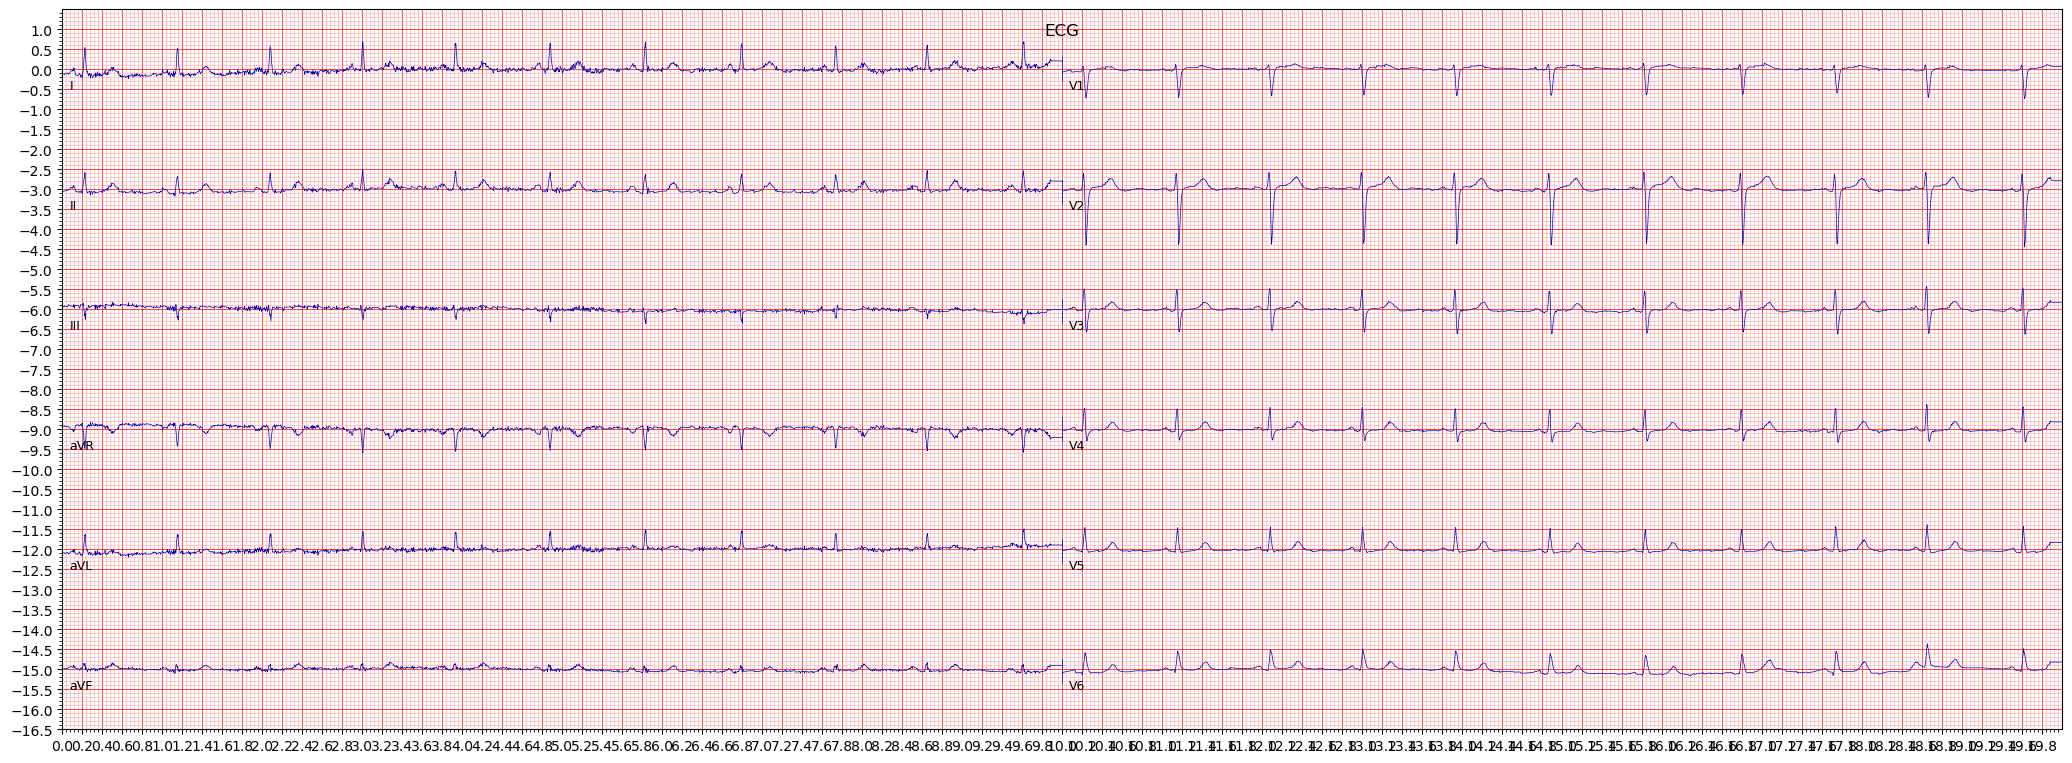

In [5]:
ecg = train_ds.find_ecg_with_diagnosis('NORM', 0)
ecg.show_with_grid()

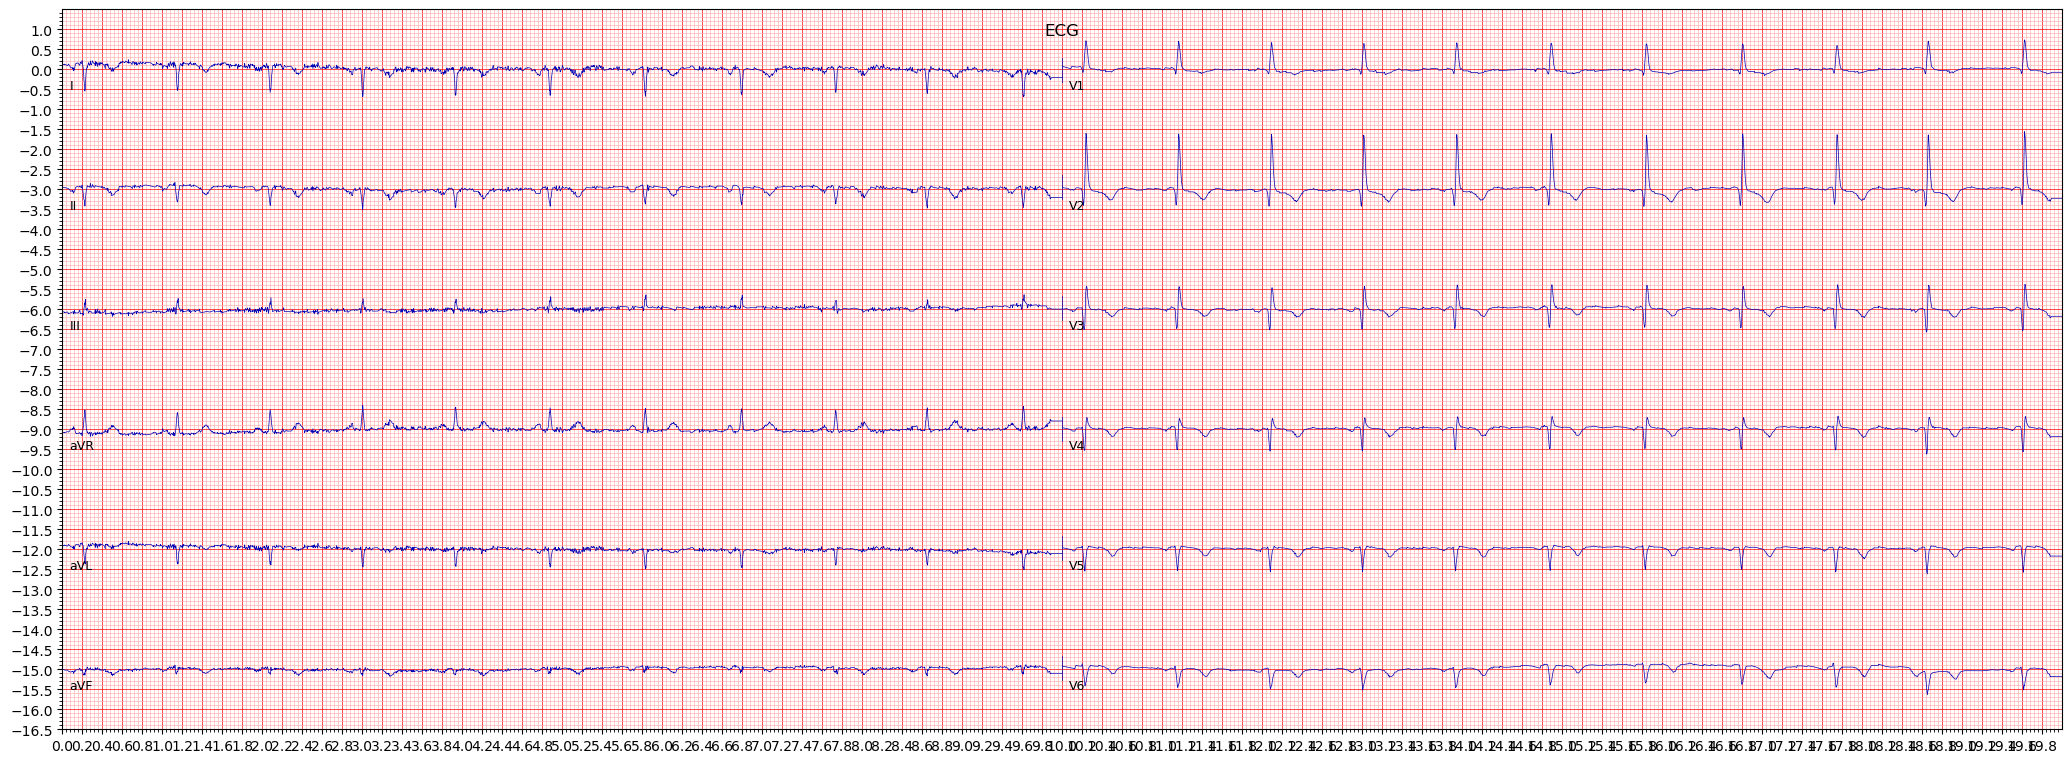

In [6]:
inverted_ecg = ecg.invert()
inverted_ecg.show_with_grid()

Delineating ECG signal...
* Delineating inverted ECG signal... *
Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...


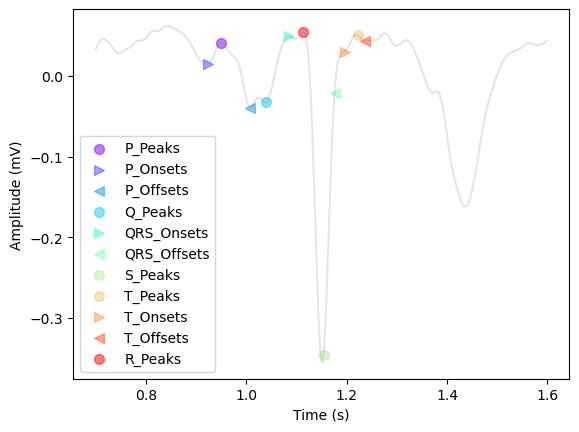

In [7]:
ecg.delineate()
ecg.plot_delineation(lead='aVR')

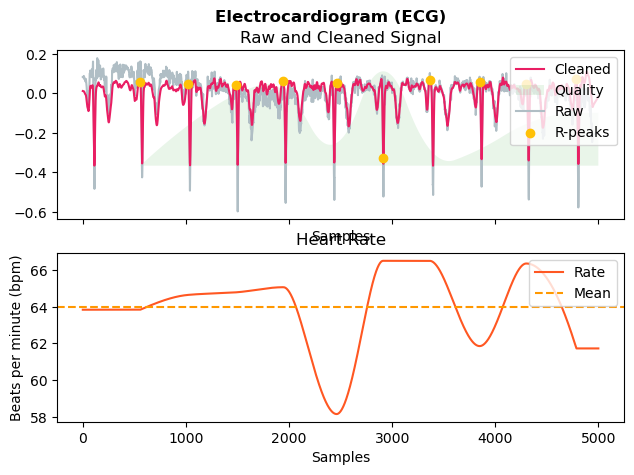

In [9]:
_, _ = ecg.process_and_plot(lead='aVR')

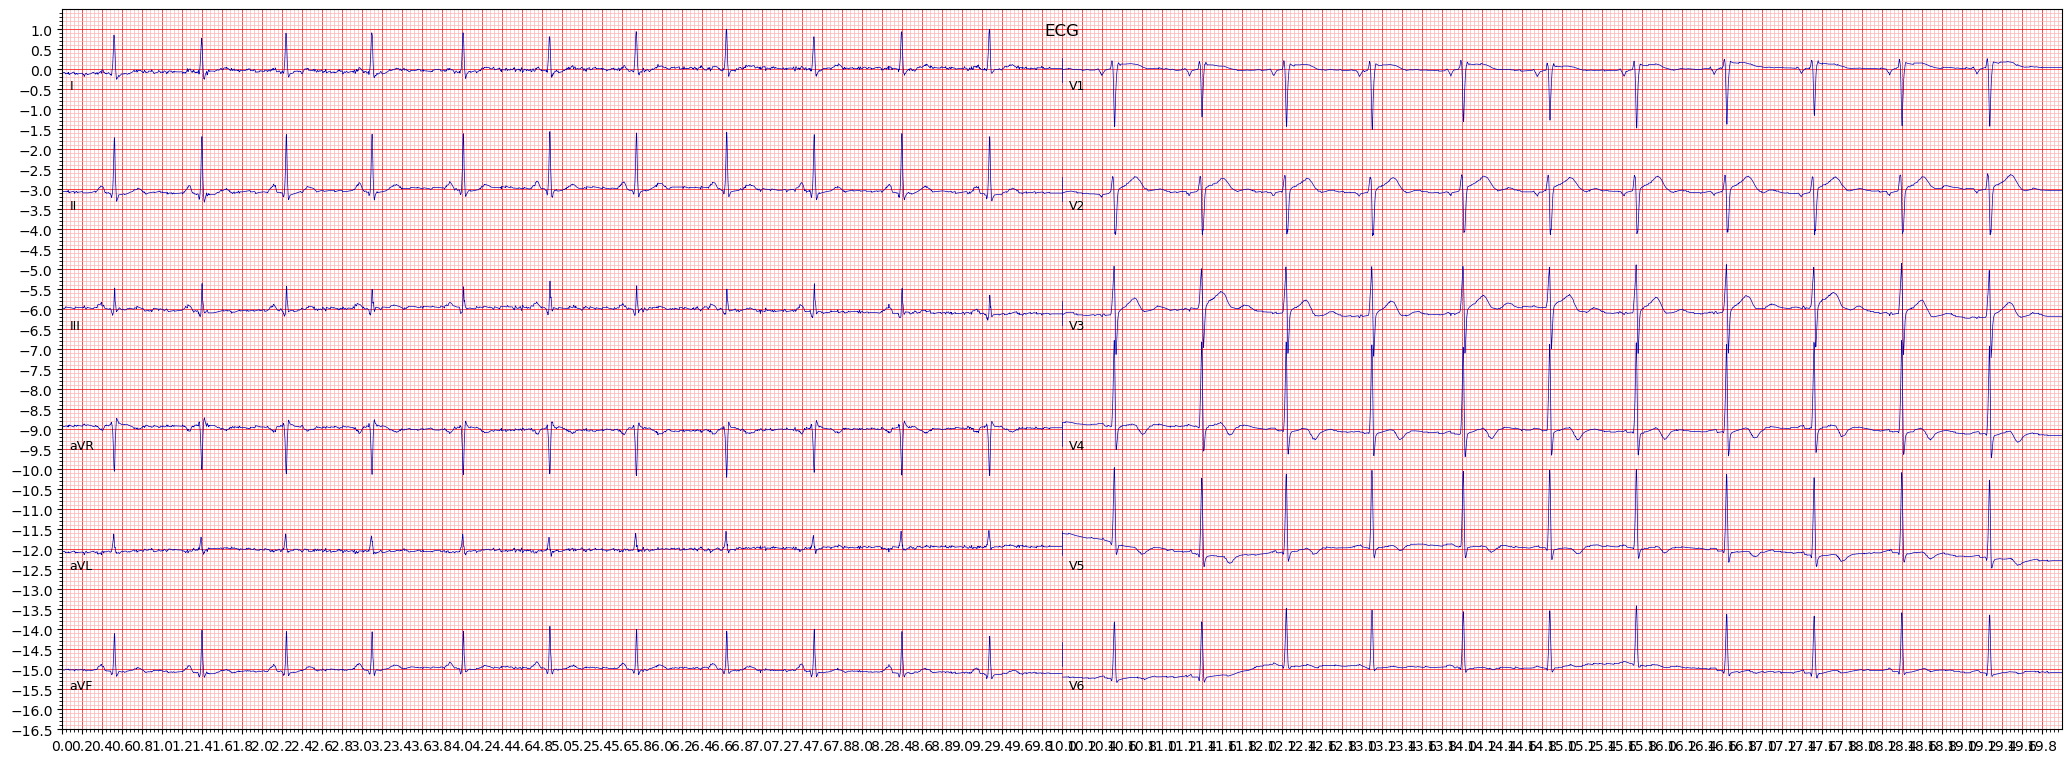

In [27]:
from src.basic.ecg import Ecg
ecg: Ecg = train_ds.find_ecg_with_diagnosis('MI', 17)
ecg.show_with_grid()

In [15]:
ecg.str_diagnoses

['LMI', 'AMI', 'RBBB', 'SR']

In [30]:
from src.utils.ecg_utils import check_all_inverted_waves
check_all_inverted_waves('T', ecg.cleaned, ecg.delineations)

array([ True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True])

Delineating ECG signal...


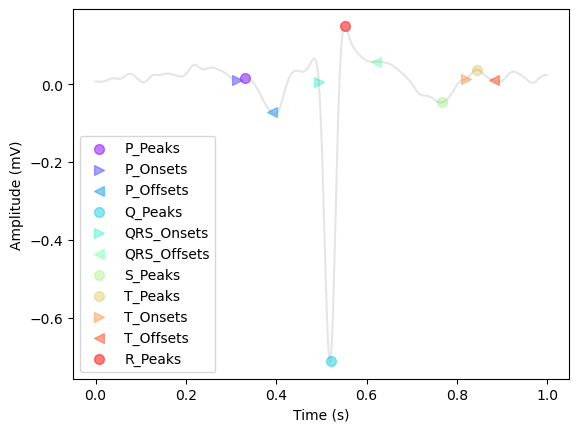

In [34]:
ecg.delineate(check_T_inversion=False, check_P_inversion=False)
ecg.plot_delineation(lead='aVR', window_range=(0, 1))

Delineating ECG signal...
* Delineating inverted ECG signal... *
Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...


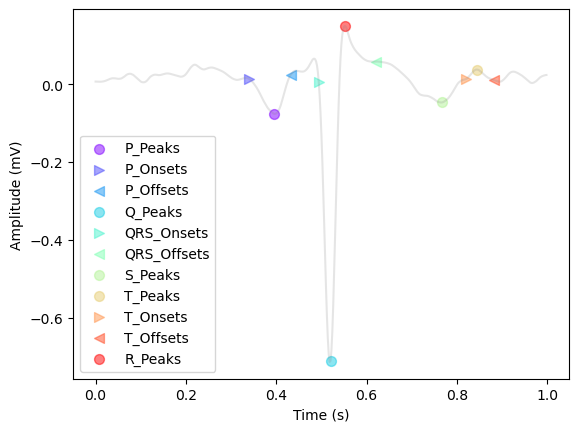

In [35]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
ecg.plot_delineation(lead='aVR', window_range=(0, 1))

Delineating ECG signal...


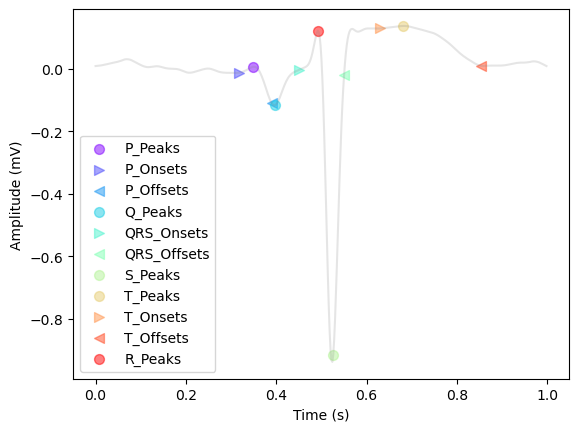

In [36]:
# ecg.delineations = None
ecg.delineate(check_P_inversion=False, check_T_inversion=False)
ecg.plot_delineation(lead='V1', window_range=(0, 1))

Delineating ECG signal...
* Delineating inverted ECG signal... *
Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...


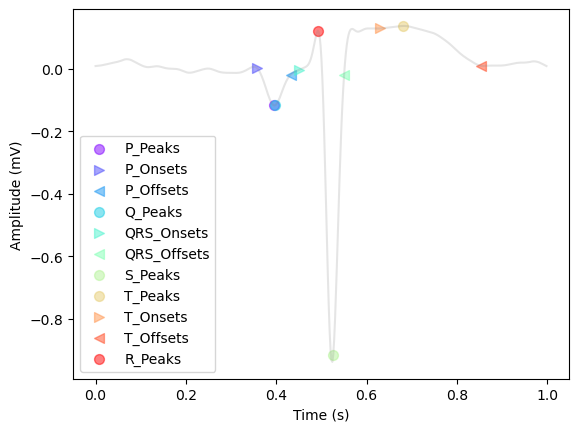

In [37]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
ecg.plot_delineation(lead='V1', window_range=(0, 1))

Delineating ECG signal...


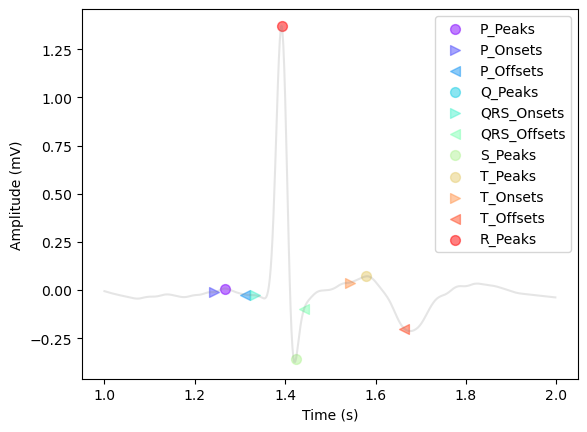

In [38]:
ecg.delineate(check_T_inversion=False, check_P_inversion=False)
ecg.plot_delineation(lead='V4', window_range=(1, 2))

Delineating ECG signal...
* Delineating inverted ECG signal... *
Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...


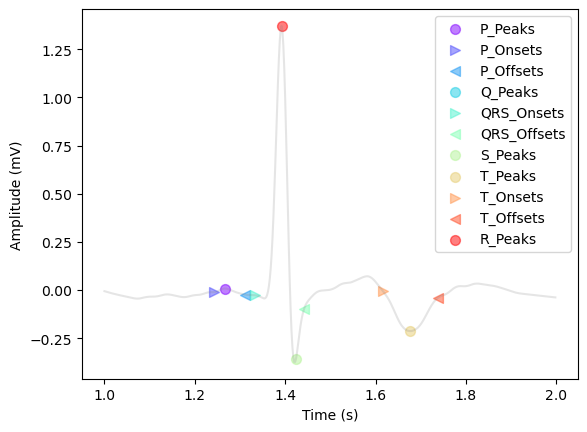

In [39]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
ecg.plot_delineation(lead='V4', window_range=(1, 2))

Delineating ECG signal...


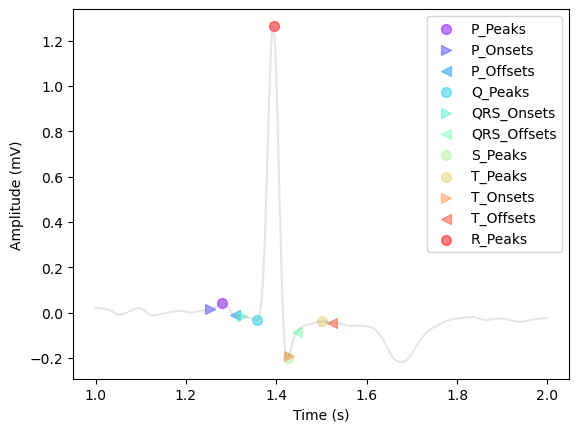

In [40]:
ecg.delineate(check_T_inversion=False, check_P_inversion=False)
ecg.plot_delineation(lead='V5', window_range=(1, 2))

Delineating ECG signal...
* Delineating inverted ECG signal... *
Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...


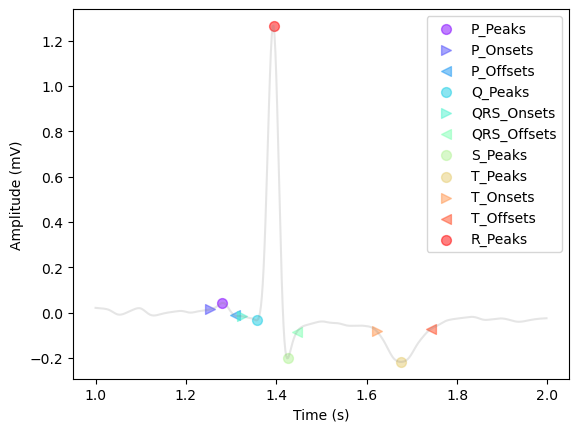

In [41]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
ecg.plot_delineation(lead='V5', window_range=(1, 2))

In [42]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
all_cycles = ecg.get_cycles()
# ecg.all_rpeaks[0].dtype

Delineating ECG signal...
* Delineating inverted ECG signal... *
Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...
Getting cardiac cycles...


In [44]:
all_cycles[0]

[CardiacCycle(P_onset=178, P_peak=200, P_offset=216, QRS_onset=231, Q_peak=241, R_peak=259, S_peak=277, QRS_offset=297, T_onset=277, T_peak=312, T_offset=324),
 CardiacCycle(P_onset=613, P_peak=635, P_offset=647, QRS_onset=674, Q_peak=671, R_peak=696, S_peak=712, QRS_offset=722, T_onset=803, T_peak=817, T_offset=838),
 CardiacCycle(P_onset=1039, P_peak=1059, P_offset=1075, QRS_onset=1083, Q_peak=1095, R_peak=1118, S_peak=1136, QRS_offset=1146, T_onset=1149, T_peak=1172, T_offset=1197),
 CardiacCycle(P_onset=1467, P_peak=1487, P_offset=1506, QRS_onset=1515, Q_peak=1527, R_peak=1547, S_peak=1565, QRS_offset=1576, T_onset=1566, T_peak=1591, T_offset=1602),
 CardiacCycle(P_onset=1915, P_peak=1934, P_offset=1961, QRS_onset=1971, Q_peak=1981, R_peak=2004, S_peak=2021, QRS_offset=2031, T_onset=2048, T_peak=2060, T_offset=2071),
 CardiacCycle(P_onset=2362, P_peak=2377, P_offset=2397, QRS_onset=2409, Q_peak=2418, R_peak=2436, S_peak=2453, QRS_offset=2466, T_onset=2454, T_peak=2471, T_offset=248

Delineating ECG signal...
* Delineating inverted ECG signal... *
Cleaning ECG signal...
Finding R-peaks...
Delineating ECG signal...


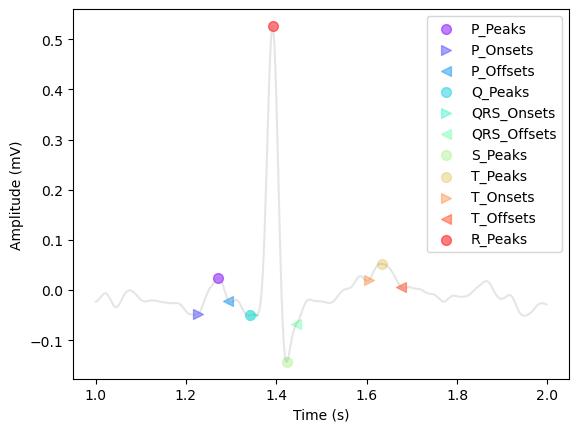

In [45]:
ecg.delineate(check_T_inversion=True, check_P_inversion=True)
ecg.plot_delineation(lead='I', window_range=(1, 2))

## Sinus Tachycardia

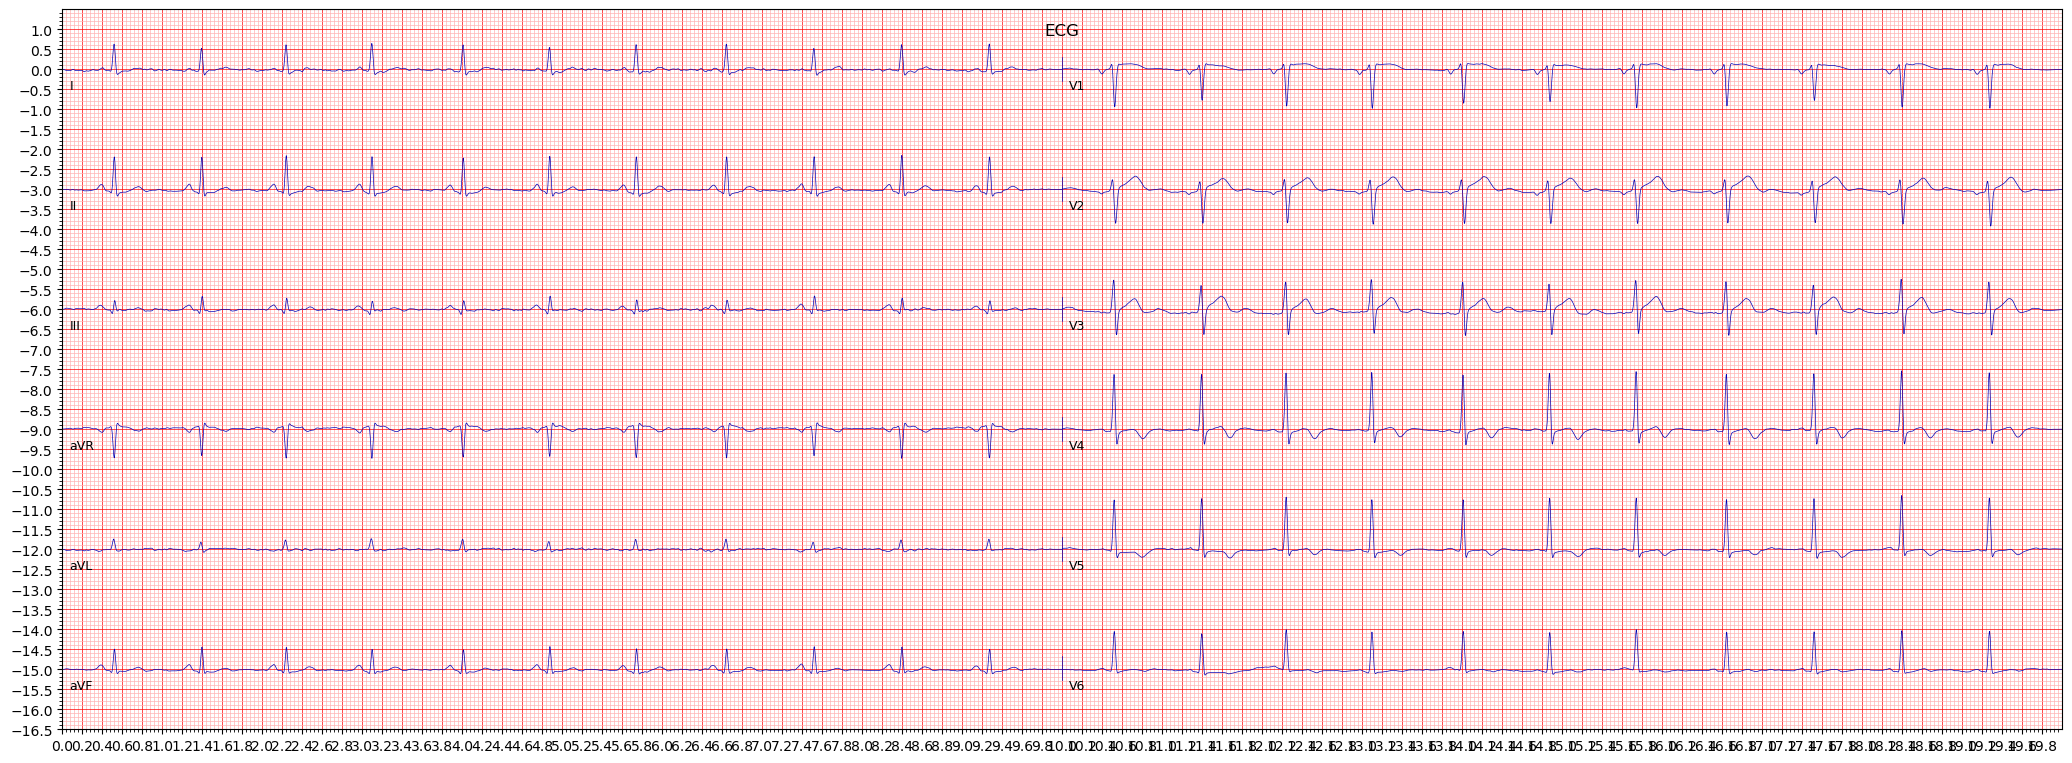

['STACH', 'NORM']


In [232]:
STACH_ecg = train_ds.find_ecg_with_diagnosis('STACH', 50)
ecg.show_with_grid(show_cleaned=True)
print(STACH_ecg.labels)

In [248]:
from src.rule.rule_module import RhythmRule
print(RhythmRule(STACH_ecg).apply())

are_RR_equidistant: True, are_PP_equidistant: True, are_PP_same_as_RR: True
HR: 102.21280712868692, is_tachy: True, is_brady: False
STACH


/Users/tf/Computer Science/Archive/FYP/ECG_XAI/src/basic/../../src/rule/rule_module.py:30: RuntimeWarning: Mean of empty slice
  return np.mean(values)
